<a href="https://colab.research.google.com/github/ElaYJ/Study_Deep_Learning/blob/main/DL_Project/label_json2df_workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

with open("./datasets/strawberry_size/wtrain_dataset.npy", 'rb') as f:
    wtrain_dataset = np.load(f)

wtrain_dataset.shape    

(395,)

In [3]:
print(wtrain_dataset[:10])

[72.   9.  42.  25.  52.  13.5 43.  16.  18.   4. ]


In [4]:
with open("./datasets/strawberry_size/strain_dataset.npy", 'rb') as f:
    strain_dataset = np.load(f)
    
strain_dataset.shape

(395, 4)

In [5]:
print(strain_dataset[:10])

[[28.5 11.   6.5  5.5]
 [31.5  8.  14.2 10.6]
 [19.2 13.   8.   6.6]
 [29.  10.   9.   7.5]
 [30.5 13.  12.   8.5]
 [29.  10.   8.   9.5]
 [27.  11.   6.5  6. ]
 [35.   7.  12.  10. ]
 [26.5  7.  11.6 10.4]
 [26.   8.   8.  10. ]]


In [6]:
with open("./datasets/strawberry_size/train_dataset.npy", 'rb') as f:
    train_dataset = np.load(f)
    
train_dataset.shape

(395, 10, 64, 64, 3)

In [8]:
tmp = train_dataset[0]

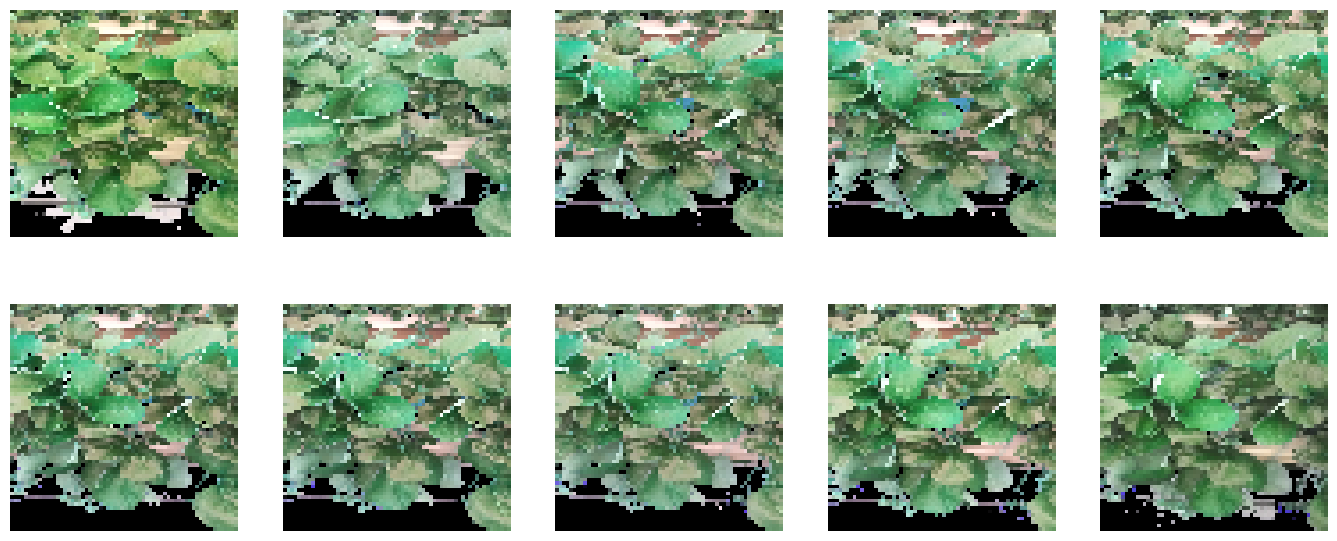

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(17,7))
for i, img in enumerate(tmp):
    # print(img.shape) #--> (64, 64, 3)
    plt.subplot(2,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

json_data_dir = "/content/drive/MyDrive/딥러닝프로젝트/json_label_data/extracted_train"
filename = "C24_B02_005_459161.json"
rm_path = os.path.join(json_data_dir, filename)

if os.path.exists(rm_path):
    os.remove(rm_path)
    print(f"{filename} 삭제")
else:
    print("존재하지 않는 파일")

C24_B02_005_459161.json 삭제


In [ ]:
import os

json_data_dir = "/content/drive/MyDrive/DLP/label_data_json/extracted_train"

json_list = os.listdir(json_data_dir)
json_list[:10], len(json_list)

(['C24_B02_003_753155.json',
  'C24_B02_002_753133.json',
  'C24_B02_003_753134.json',
  'C24_B02_003_753162.json',
  'C24_B02_005_753144.json',
  'C24_B02_004_753149.json',
  'C24_B02_005_753137.json',
  'C24_B02_006_753138.json',
  'C24_B02_004_753142.json',
  'C24_B02_001_753129.json'],
 24346)

In [ ]:
import json

with open(os.path.join(json_data_dir, json_list[0]), 'r') as f:
    data = json.load(f)

data

{'images': {'image_id': 753155,
  'farm_id': 'AIF005',
  'crops_id': 'C24_B02',
  'crops': '딸기',
  'kind_type': '금실',
  'file_path': '/cropsImages/B/B02/AIF005/C24',
  'fname': 'C24_B02_003_220108151516.jpg',
  'fext': 'jpg',
  'width': '1087',
  'height': '1440',
  'create_date': '2022-01-10',
  'date_captured': '2022-01-08 15:15:16',
  'growth_stage': '출뢰기',
  'leaf': '1',
  'plant_body': '0'},
 'envrionments': [{'farm_id': 'AIF005',
   'receive_date': '2022-01-08 15:14:29',
   'id': 0,
   'ti_value': '21.0',
   'hi_value': '14.0',
   'ci_value': '462',
   'ir_value': None,
   'tl_value': None,
   'ei_value': None,
   'pl_value': None},
  {'farm_id': 'AIF005',
   'receive_date': '2022-01-08 15:10:27',
   'id': 1,
   'ti_value': '22.0',
   'hi_value': '12.0',
   'ci_value': '464',
   'ir_value': None,
   'tl_value': None,
   'ei_value': None,
   'pl_value': None}],
 'growth_index': {'corps_id': 'C24_B02',
  'measured_date': None,
  'stem_length': None,
  'leaf_cnt': None,
  'leaf_widt

In [ ]:
img_id = data['images']['image_id']
farm_id = data['images']['farm_id']
crops_id = data['images']['crops_id']
img_id, farm_id, crops_id

(753155, 'AIF005', 'C24_B02')

In [ ]:
crops_type = data['images']['crops'] +" "+ data['images']['kind_type']
crops_type

'딸기 금실'

In [ ]:
fname = json_list[0].split('.')[0]
fname

'C24_B02_003_753155'

In [ ]:
img_width = int(data['images']['width'])
img_height = int(data['images']['height'])
img_width, img_height

(1087, 1440)

In [ ]:
from datetime import datetime

date_string = "2021-11-19 15:19:57"
date_time = datetime.strptime(date_string, "%Y-%m-%d %H:%M:%S")

print(date_time, type(date_time))

2021-11-19 15:19:57 <class 'datetime.datetime'>


#### - datetime casting

- 파이썬에서 문자열을 datetime 자료형으로 변환하려면 `datetime` 모듈의 `strptime()` 함수를 사용한다.

- 이 함수를 사용하여 문자열을 날짜와 시간으로 파싱할 수 있습니다.

- "2021-11-19 15:19:57" 문자열을 datetime 자료형으로 변환하는 예제

    ```python
    from datetime import datetime

    date_string = "2021-11-19 15:19:57"
    date_time = datetime.strptime(date_string, "%Y-%m-%d %H:%M:%S")
    ```
    ▷ "2021-11-19 15:19:57" 문자열이 파싱되어 datetime 객체로 저장

- `strptime()` 함수의

    첫 번째 인수로 변환하려는 문자열을,
    
    두 번째 인수로는 해당 문자열의 형식을 지정하는 포맷 문자열을 전달한다.
    
    - `%Y`는 네 자리 연도를,
    - `%m`은 두 자리 월을,
    - `%d`는 두 자리 일을,
    - `%H`는 24시간 형식의 시를,
    - `%M`은 분을,
    - `%S`는 초를 나타냄.

<br></br>

- `strftime()` 함수는 파이썬의 `datetime` 객체를 문자열로 변환하는 메서드이다.

- 이 함수를 사용하면 `datetime` 객체를 지정된 형식의 문자열로 변환할 수 있습니다.

- 날짜와 시간을 다양한 형식으로 출력하거나 저장해야 하는 경우 `strftime()` 함수를 사용할 수 있다.

- 사용 예제

    ```python
    from datetime import datetime

    # 현재 시간을 가져옵니다.
    now = datetime.now()

    # strftime() 함수를 사용하여 현재 시간을 지정된 형식의 문자열로 변환합니다.
    # 현재 시간을 "연도-월-일 시간:분:초" 형식의 문자열로 저장됩니다.
    formatted_time = now.strftime("%Y-%m-%d %H:%M:%S")
    print("현재 시간:", formatted_time)
    ```

    - `%Y`, `%m`, `%d`, `%H`, `%M`, `%S`는 각각 연도, 월, 일, 시간, 분, 초를 나타냄.



In [ ]:
captured_date = data['images']['date_captured']
captured_date = datetime.strptime(captured_date, "%Y-%m-%d %H:%M:%S")
captured_date

datetime.datetime(2022, 1, 7, 14, 44, 31)

In [ ]:
date = captured_date.date()
time = captured_date.time()
date, time

(datetime.date(2022, 1, 7), datetime.time(14, 44, 31))

In [ ]:
growth_stage = data['images']['growth_stage']
growth_stage

'출뢰기'

In [ ]:
env1_inner_temper = data['envrionments'][0]['ti_value'] # 내부 온도 (℃)
env1_inner_humidi = data['envrionments'][0]['hi_value'] # 내부 습도 (%)
env1_inner_CO2 = data['envrionments'][0]['ci_value'] # 내부 CO₂ (ppm)
env1_inner_light = data['envrionments'][0]['ir_value'] # 광량 (㎛ol/㎥s)
env1_inner_temper, env1_inner_humidi, env1_inner_CO2, env1_inner_light

('21.0', '14.0', '462', None)

In [ ]:
env2_inner_temper = data['envrionments'][1]['ti_value'] # 내부 온도 (℃)
env2_inner_humidi = data['envrionments'][1]['hi_value'] # 내부 습도 (%)
env2_inner_CO2 = data['envrionments'][1]['ci_value'] # 내부 CO₂ (ppm)
env2_inner_light = data['envrionments'][1]['ir_value'] # 광량 (㎛ol/㎥s)
env2_inner_temper, env2_inner_humidi, env2_inner_CO2, env2_inner_light

('22.0', '12.0', '464', None)

In [ ]:
environments = data['envrionments']
environments

[{'farm_id': 'AIF005',
  'receive_date': '2022-01-08 15:14:29',
  'id': 0,
  'ti_value': '21.0',
  'hi_value': '14.0',
  'ci_value': '462',
  'ir_value': None,
  'tl_value': None,
  'ei_value': None,
  'pl_value': None},
 {'farm_id': 'AIF005',
  'receive_date': '2022-01-08 15:10:27',
  'id': 1,
  'ti_value': '22.0',
  'hi_value': '12.0',
  'ci_value': '464',
  'ir_value': None,
  'tl_value': None,
  'ei_value': None,
  'pl_value': None}]

In [ ]:
len(environments[0]), len(environments[1])

(10, 10)

In [ ]:
growth_info = data['growth_index']
growth_info

{'corps_id': 'C24_B02',
 'measured_date': None,
 'stem_length': None,
 'leaf_cnt': None,
 'leaf_width': None,
 'leaf_length': None,
 'stem_thick': None,
 'fr_weight': None}

In [ ]:
for key, val in growth_info.items():
    print(f"{key} --> {val}")

corps_id --> C24_B02
measured_date --> None
stem_length --> None
leaf_cnt --> None
leaf_width --> None
leaf_length --> None
stem_thick --> None
fr_weight --> None


In [ ]:
for i, (k, v) in enumerate(growth_info.items()):
    if i==0: continue
    if v: print(f"{k} --> {v}")

In [ ]:
etc_info = data['etc_infor']
etc_info

{'corps_id': 'C24_B02', 'create_date': '', 'inform': ''}

In [ ]:
annotations = data['annotations']
annotations

[{'segmentation': [656.78,
   685.02,
   704.33,
   685.02,
   704.33,
   737.15,
   656.78,
   737.15],
  'area': 2479.3,
  'bbox': [656.78, 685.02, 47.56, 52.13],
  'isCrowd': 0,
  'id': 0,
  'image_id': 753155,
  'category_id': 0},
 {'segmentation': [758.65,
   717.95,
   837.32,
   717.95,
   837.32,
   832.9,
   758.65,
   832.9],
  'area': 9043.11,
  'bbox': [758.65, 717.95, 78.67, 114.95],
  'isCrowd': 0,
  'id': 1,
  'image_id': 753155,
  'category_id': 1},
 {'segmentation': [806.23,
   744.79,
   878.19,
   744.79,
   878.19,
   793.87,
   806.23,
   793.87],
  'area': 3531.79,
  'bbox': [806.23, 744.79, 71.96, 49.08],
  'isCrowd': 0,
  'id': 2,
  'image_id': 753155,
  'category_id': 2},
 {'segmentation': [804.4,
   674.65,
   896.49,
   674.65,
   896.49,
   757.27,
   804.4,
   757.27],
  'area': 7608.47,
  'bbox': [804.4, 674.65, 92.09, 82.62],
  'isCrowd': 0,
  'id': 3,
  'image_id': 753155,
  'category_id': 3},
 {'segmentation': [708.02,
   653.3,
   754.36,
   653.3,
   

In [ ]:
categories = data['categories']
categories

[{'id': 0, 'name': '화방', 'supercategory': 'none'},
 {'id': 1, 'name': '과실', 'supercategory': 'none'},
 {'id': 2, 'name': '과실', 'supercategory': 'none'},
 {'id': 3, 'name': '과실', 'supercategory': 'none'},
 {'id': 4, 'name': '화방', 'supercategory': 'none'},
 {'id': 5, 'name': '화방', 'supercategory': 'none'},
 {'id': 6, 'name': '잎', 'supercategory': 'none'},
 {'id': 7, 'name': '줄기', 'supercategory': 'none'},
 {'id': 8, 'name': '줄기', 'supercategory': 'none'},
 {'id': 9, 'name': '줄기', 'supercategory': 'none'}]

In [ ]:
for a, c in zip(annotations, categories):
    print(a['image_id'])
    print(a['segmentation'])
    print(a['area'])
    print(a['bbox'])
    print(c['name'])

753155
[656.78, 685.02, 704.33, 685.02, 704.33, 737.15, 656.78, 737.15]
2479.3
[656.78, 685.02, 47.56, 52.13]
화방
753155
[758.65, 717.95, 837.32, 717.95, 837.32, 832.9, 758.65, 832.9]
9043.11
[758.65, 717.95, 78.67, 114.95]
과실
753155
[806.23, 744.79, 878.19, 744.79, 878.19, 793.87, 806.23, 793.87]
3531.79
[806.23, 744.79, 71.96, 49.08]
과실
753155
[804.4, 674.65, 896.49, 674.65, 896.49, 757.27, 804.4, 757.27]
7608.47
[804.4, 674.65, 92.09, 82.62]
과실
753155
[708.02, 653.3, 754.36, 653.3, 754.36, 702.99, 708.02, 702.99]
2302.63
[708.02, 653.3, 46.34, 49.69]
화방
753155
[763.53, 631.34, 846.02, 631.34, 846.02, 711.38, 763.53, 711.38]
6602.49
[763.53, 631.34, 82.49, 80.04]
화방
753155
[697.04, 586.21, 792.79, 586.21, 792.79, 638.95, 697.04, 638.95]
5049.85
[697.04, 586.21, 95.75, 52.74]
잎
753155
[851.37, 566.08, 916.62, 566.08, 916.62, 624.31, 851.37, 624.31]
3799.5
[851.37, 566.08, 65.25, 58.23]
줄기
753155
[997.16, 605.12, 1020.32, 605.12, 1020.32, 810.94, 997.16, 810.94]
4766.79
[997.16, 605.12,

In [ ]:
import json
from tqdm.notebook import tqdm

df_data = dict(
    fname=[], image_id=[], farm_id=[], crops_id=[],
    crops_type=[], growth_stage=[], c_date=[], c_time=[],
    env1=[], env2=[], growth_info=[], etc_info=[],
    img_width=[], img_height=[], bbox_num=[], annotations=[], categories=[]
)
annot_data = dict(
    image_id=[], fname=[],
    segment=[], area=[], bbox=[], category=[]
)
exinfo_json = set()

for jname in tqdm(json_list, desc='Processing'):
    with open(os.path.join(json_data_dir, jname), 'r') as f:
        data = json.load(f)

    f_name = jname.split('.')[0]
    df_data['fname'].append(f_name)
    val = data['images']['image_id']
    df_data['image_id'].append(val if val else None)
    val = data['images']['farm_id']
    df_data['farm_id'].append(val if val else None)
    val = data['images']['crops_id']
    df_data['crops_id'].append(val if val else None)
    val = datetime.strptime(data['images']['date_captured'], "%Y-%m-%d %H:%M:%S")
    df_data['c_date'].append(val.date() if val else None)
    df_data['c_time'].append(val.time() if val else None)
    val = data['images']['crops'] +" "+ data['images']['kind_type']
    df_data['crops_type'].append(val if val else None)
    val = data['images']['growth_stage']
    df_data['growth_stage'].append(val if val else None)
    val = data['envrionments'][0]
    if len(val) > 10:
        exinfo_json.add(jname)
        print(f"{jname} : {val.keys()}")
    df_data['env1'].append(val if val else None)
    val = data['envrionments'][1]
    if len(val) > 10:
        exinfo_json.add(jname)
        print(f"{jname} : {val.keys()}")
    df_data['env2'].append(val if val else None)
    val = data['growth_index']
    df_data['growth_info'].append(val if val else None)
    for i, (k, v) in enumerate(val.items()):
        if i==0: continue
        if v:
            exinfo_json.add(jname)
            print(f"{jname} : {k} --> {v}")
    val = data['etc_infor']
    df_data['etc_info'].append(val if val else None)
    for i, (k, v) in enumerate(val.items()):
        if i==0: continue
        if v:
            exinfo_json.add(jname)
            print(f"{jname} : {k} --> {v}")
    val = int(data['images']['width'])
    df_data['img_width'].append(val if val else None)
    val = int(data['images']['height'])
    df_data['img_height'].append(val if val else None)
    anno = data['annotations']
    cate = data['categories']
    df_data['bbox_num'].append(len(anno))
    df_data['annotations'].append(anno)
    df_data['categories'].append(cate)
    for a, c in zip(anno, cate):
        annot_data['image_id'].append(a['image_id'])
        annot_data['fname'].append(f_name)
        annot_data['segment'].append(a['segmentation'])
        annot_data['area'].append(a['area'])
        annot_data['bbox'].append(a['bbox'])
        annot_data['category'].append(c['name'])

Processing:   0%|          | 0/24346 [00:00<?, ?it/s]

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
C23_B02_006_429175.json : stem_thick --> 14.4
C23_B02_006_429175.json : bloom1_date --> 2021-09-15
C23_B02_006_429175.json : fr1_cnt --> 2
C23_B02_006_429175.json : fr_weight --> 6
C23_B02_002_429171.json : dict_keys(['farm_id', 'receive_date', 'id', 'ti_value', 'hi_value', 'ci_value', 'ir_value', 'tl_value', 'ei_value', 'pl_value', 'sr_value', 'cl_value', 'el_value', 'hl_value', 'pi_value', 'rp_value'])
C23_B02_002_429171.json : dict_keys(['farm_id', 'receive_date', 'id', 'ti_value', 'hi_value', 'ci_value', 'ir_value', 'tl_value', 'ei_value', 'pl_value', 'sr_value', 'cl_value', 'el_value', 'hl_value', 'pi_value', 'rp_value'])
C23_B02_002_429171.json : measured_date --> 2021-11-03
C23_B02_002_429171.json : stem_length --> 27.7
C23_B02_002_429171.json : leaf_cnt --> 11
C23_B02_002_429171.json : leaf_width --> 7.8
C23_B02_002_429171.json : leaf_length --> 10.9
C23_B02_002_429171.json : stem_thick --> 13.2
C23_B02_002_429171.json : bloom1_date --> 2021-

In [ ]:
import pandas as pd

df = pd.DataFrame(df_data)
df

,fname,image_id,farm_id,crops_id,crops_type,growth_stage,c_date,c_time,env1,env2,growth_info,etc_info,img_width,img_height,bbox_num,annotations,categories
0,C24_B02_003_753155,753155,AIF005,C24_B02,딸기 금실,출뢰기,2022-01-08,15:15:16,"{'farm_id': 'AIF005', 'receive_date': '2022-01...","{'farm_id': 'AIF005', 'receive_date': '2022-01...","{'corps_id': 'C24_B02', 'measured_date': None,...","{'corps_id': 'C24_B02', 'create_date': '', 'in...",1087,1440,10,"[{'segmentation': [656.78, 685.02, 704.33, 685...","[{'id': 0, 'name': '화방', 'supercategory': 'non..."
1,C24_B02_002_753133,753133,AIF005,C24_B02,딸기 금실,출뢰기,2022-01-08,12:15:16,"{'farm_id': 'AIF005', 'receive_date': '2022-01...","{'farm_id': 'AIF005', 'receive_date': '2022-01...","{'corps_id': 'C24_B02', 'measured_date': None,...","{'corps_id': 'C24_B02', 'create_date': '', 'in...",1121,1441,2,"[{'segmentation': [639.03, 524.27, 692.62, 524...","[{'id': 0, 'name': '줄기', 'supercategory': 'non..."
2,C24_B02_003_753134,753134,AIF005,C24_B02,딸기 금실,출뢰기,2022-01-08,12:15:16,"{'farm_id': 'AIF005', 'receive_date': '2022-01...","{'farm_id': 'AIF005', 'receive_date': '2022-01...","{'corps_id': 'C24_B02', 'measured_date': None,...","{'corps_id': 'C24_B02', 'create_date': '', 'in...",1087,1440,10,"[{'segmentation': [655.86, 681.28, 708.9, 681....","[{'id': 0, 'name': '화방', 'supercategory': 'non..."
3,C24_B02_003_753162,753162,AIF005,C24_B02,딸기 금실,출뢰기,2022-01-08,17:15:16,"{'farm_id': 'AIF005', 'receive_date': '2022-01...","{'farm_id': 'AIF005', 'receive_date': '2022-01...","{'corps_id': 'C24_B02', 'measured_date': None,...","{'corps_id': 'C24_B02', 'create_date': '', 'in...",1087,1440,6,"[{'segmentation': [654.81, 685.55, 702.7, 685....","[{'id': 0, 'name': '화방', 'supercategory': 'non..."
4,C24_B02_005_753144,753144,AIF005,C24_B02,딸기 금실,출뢰기,2022-01-08,14:15:16,"{'farm_id': 'AIF005', 'receive_date': '2022-01...","{'farm_id': 'AIF005', 'receive_date': '2022-01...","{'corps_id': 'C24_B02', 'measured_date': None,...","{'corps_id': 'C24_B02', 'create_date': '', 'in...",1153,1277,4,"[{'segmentation': [316.88, 679.55, 527.79, 679...","[{'id': 0, 'name': '잎', 'supercategory': 'none..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24341,C22_B02_007_414673,414673,AIF005,C22_B02,딸기 금실,개화기,2021-08-29,06:46:51,"{'farm_id': 'AIF005', 'receive_date': '2021-08...","{'farm_id': 'AIF005', 'receive_date': '2021-08...","{'corps_id': 'C22_B02', 'measured_date': None,...","{'corps_id': 'C22_B02', 'create_date': '', 'in...",1419,1910,12,"[{'segmentation': [1041.06, 439.31, 1367.39, 4...","[{'id': 0, 'name': '잎', 'supercategory': 'none..."
24342,C22_B02_005_414678,414678,AIF005,C22_B02,딸기 금실,출뢰기,2021-08-29,07:46:51,"{'farm_id': 'AIF005', 'receive_date': '2021-08...","{'farm_id': 'AIF005', 'receive_date': '2021-08...","{'corps_id': 'C22_B02', 'measured_date': None,...","{'corps_id': 'C22_B02', 'create_date': '', 'in...",1286,1669,9,"[{'segmentation': [583.91, 522.4, 769.33, 522....","[{'id': 0, 'name': '잎', 'supercategory': 'none..."
24343,C22_B02_002_414674,414674,AIF005,C22_B02,딸기 금실,정식기,2021-08-29,07:46:51,"{'farm_id': 'AIF005', 'receive_date': '2021-08...","{'farm_id': 'AIF005', 'receive_date': '2021-08...","{'corps_id': 'C22_B02', 'measured_date': None,...","{'corps_id': 'C22_B02', 'create_date': '', 'in...",1389,2133,3,"[{'segmentation': [408.28, 327.55, 728.42, 327...","[{'id': 0, 'name': '잎', 'supercategory': 'none..."
24344,C22_B02_001_414689,414689,AIF005,C22_B02,딸기 금실,정식기,2021-08-29,09:46:51,"{'farm_id': 'AIF005', 'receive_date': '2021-08...","{'farm_id': 'AIF005', 'receive_date': '2021-08...","{'corps_id': 'C22_B02', 'measured_date': None,...","{'corps_id': 'C22_B02', 'create_date': '', 'in...",1511,2064,6,"[{'segmentation': [20.75, 226.75, 428.42, 226....","[{'id': 0, 'name': '잎', 'supercategory': 'none..."


In [ ]:
df.to_csv("/content/drive/MyDrive/DLP/train_meta_data.csv", index=False)

In [ ]:
annot_df = pd.DataFrame(annot_data)
annot_df

,image_id,fname,segment,area,bbox,category
0,753155,C24_B02_003_753155,"[656.78, 685.02, 704.33, 685.02, 704.33, 737.1...",2479.30,"[656.78, 685.02, 47.56, 52.13]",화방
1,753155,C24_B02_003_753155,"[758.65, 717.95, 837.32, 717.95, 837.32, 832.9...",9043.11,"[758.65, 717.95, 78.67, 114.95]",과실
2,753155,C24_B02_003_753155,"[806.23, 744.79, 878.19, 744.79, 878.19, 793.8...",3531.79,"[806.23, 744.79, 71.96, 49.08]",과실
3,753155,C24_B02_003_753155,"[804.4, 674.65, 896.49, 674.65, 896.49, 757.27...",7608.47,"[804.4, 674.65, 92.09, 82.62]",과실
4,753155,C24_B02_003_753155,"[708.02, 653.3, 754.36, 653.3, 754.36, 702.99,...",2302.63,"[708.02, 653.3, 46.34, 49.69]",화방
...,...,...,...,...,...,...
173803,414696,C22_B02_001_414696,"[446.4, 419.87, 616.48, 419.87, 616.48, 533.04...",19247.95,"[446.4, 419.87, 170.08, 113.17]",줄기
173804,414696,C22_B02_001_414696,"[567.86, 636.11, 725.11, 636.11, 725.11, 852.9...",34099.66,"[567.86, 636.11, 157.25, 216.85]",줄기
173805,414696,C22_B02_001_414696,"[663.66, 749.66, 806.08, 749.66, 806.08, 1054....",43402.69,"[663.66, 749.66, 142.43, 304.73]",줄기
173806,414696,C22_B02_001_414696,"[775.26, 609.44, 827.83, 609.44, 827.83, 1063....",23856.79,"[775.26, 609.44, 52.57, 453.81]",줄기


In [ ]:
annot_df.to_csv("/content/drive/MyDrive/DLP/train_annot_data.csv", index=False)

In [ ]:
len(exinfo_json)

3016

In [ ]:
for json in exinfo_json:
    print(json)
    break

C25_B02_006_449700.json


In [ ]:
exinfo_list = [x.split('.')[0] for x in exinfo_json]
len(exinfo_list), exinfo_list[0]

(3016, 'C25_B02_006_449700')

In [ ]:
ex_df = df[df['fname'].isin(exinfo_list)]
ex_df

,fname,image_id,farm_id,crops_id,crops_type,growth_stage,c_date,c_time,env1,env2,growth_info,etc_info,img_width,img_height,bbox_num,annotations,categories
395,C24_B02_003_777478,777478,AIF005,C24_B02,딸기 금실,출뢰기,2022-01-12,08:15:16,"{'farm_id': 'AIF005', 'receive_date': '2022-01...","{'farm_id': 'AIF005', 'receive_date': '2022-01...","{'corps_id': 'C24_B02', 'measured_date': '2022...","{'corps_id': 'C24_B02', 'create_date': '', 'in...",1091,1445,14,"[{'segmentation': [902.19, 693.7, 988.81, 693....","[{'id': 0, 'name': '잎', 'supercategory': 'none..."
397,C22_B02_006_777468,777468,AIF005,C22_B02,딸기 금실,출뢰기,2022-01-12,08:13:02,"{'farm_id': 'AIF005', 'receive_date': '2022-01...","{'farm_id': 'AIF005', 'receive_date': '2022-01...","{'corps_id': 'C22_B02', 'measured_date': '2022...","{'corps_id': 'C22_B02', 'create_date': '', 'in...",1001,1334,9,"[{'segmentation': [497.67, 581.59, 530.36, 581...","[{'id': 0, 'name': '줄기', 'supercategory': 'non..."
402,C25_B02_004_777459,777459,AIF005,C25_B02,딸기 금실,과실비대기,2022-01-12,07:44:31,"{'farm_id': 'AIF005', 'receive_date': '2022-01...","{'farm_id': 'AIF005', 'receive_date': '2022-01...","{'corps_id': 'C25_B02', 'measured_date': '2022...","{'corps_id': 'C25_B02', 'create_date': '', 'in...",1065,1559,4,"[{'segmentation': [452.27, 886.05, 556.2, 886....","[{'id': 0, 'name': '과실', 'supercategory': 'non..."
404,C24_B02_002_777477,777477,AIF005,C24_B02,딸기 금실,출뢰기,2022-01-12,08:15:16,"{'farm_id': 'AIF005', 'receive_date': '2022-01...","{'farm_id': 'AIF005', 'receive_date': '2022-01...","{'corps_id': 'C24_B02', 'measured_date': '2022...","{'corps_id': 'C24_B02', 'create_date': '', 'in...",949,1447,4,"[{'segmentation': [307.54, 457.32, 383.54, 457...","[{'id': 0, 'name': '줄기', 'supercategory': 'non..."
405,C22_B02_007_777469,777469,AIF005,C22_B02,딸기 금실,수확기,2022-01-12,08:13:02,"{'farm_id': 'AIF005', 'receive_date': '2022-01...","{'farm_id': 'AIF005', 'receive_date': '2022-01...","{'corps_id': 'C22_B02', 'measured_date': '2022...","{'corps_id': 'C22_B02', 'create_date': '', 'in...",958,1280,5,"[{'segmentation': [647.46, 686.95, 821.68, 686...","[{'id': 0, 'name': '잎', 'supercategory': 'none..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23466,C22_B02_003_416429,416429,AIF005,C22_B02,딸기 금실,정식기,2021-09-29,17:19:03,"{'farm_id': 'AIF005', 'receive_date': '2021-09...","{'farm_id': 'AIF005', 'receive_date': '2021-09...","{'corps_id': 'C22_B02', 'measured_date': '2021...","{'corps_id': 'C22_B02', 'create_date': '', 'in...",1419,1766,8,"[{'segmentation': [35.07, 340.35, 199.45, 340....","[{'id': 0, 'name': '잎', 'supercategory': 'none..."
23467,C22_B02_006_416425,416425,AIF005,C22_B02,딸기 금실,정식기,2021-09-29,17:16:08,"{'farm_id': 'AIF005', 'receive_date': '2021-09...","{'farm_id': 'AIF005', 'receive_date': '2021-09...","{'corps_id': 'C22_B02', 'measured_date': '2021...","{'corps_id': 'C22_B02', 'create_date': '', 'in...",1243,1783,7,"[{'segmentation': [604.92, 662.13, 860.11, 662...","[{'id': 0, 'name': '잎', 'supercategory': 'none..."
23470,C22_B02_007_416440,416440,AIF005,C22_B02,딸기 금실,수확기,2021-09-29,17:31:56,"{'farm_id': 'AIF005', 'receive_date': '2021-09...","{'farm_id': 'AIF005', 'receive_date': '2021-09...","{'corps_id': 'C22_B02', 'measured_date': '2021...","{'corps_id': 'C22_B02', 'create_date': '', 'in...",1290,1875,9,"[{'segmentation': [376.39, 447.79, 700.37, 447...","[{'id': 0, 'name': '잎', 'supercategory': 'none..."
23471,C22_B02_006_416439,416439,AIF005,C22_B02,딸기 금실,정식기,2021-09-29,17:31:56,"{'farm_id': 'AIF005', 'receive_date': '2021-09...","{'farm_id': 'AIF005', 'receive_date': '2021-09...","{'corps_id': 'C22_B02', 'measured_date': '2021...","{'corps_id': 'C22_B02', 'create_date': '', 'in...",1299,1692,8,"[{'segmentation': [521.13, 634.72, 770.06, 634...","[{'id': 0, 'name': '잎', 'supercategory': 'none..."


In [ ]:
ex_df.to_csv("/content/drive/MyDrive/DLP/train_ex_data.csv", index=False)

In [ ]:
json_data_dir = "/content/drive/MyDrive/DLP/label_data_json/extracted_valid"

json_list = os.listdir(json_data_dir)
json_list[:10], len(json_list)

(['C25_B02_003_423515.json',
  'C24_B02_005_455867.json',
  'C24_B02_005_455902.json',
  'C24_B02_005_455944.json',
  'C24_B02_005_455965.json',
  'C24_B02_005_456103.json',
  'C24_B02_005_456131.json',
  'C24_B02_005_456173.json',
  'C24_B02_005_456290.json',
  'C24_B02_005_456732.json'],
 3025)

In [ ]:
import json

df_data = dict(
    fname=[], image_id=[], farm_id=[], crops_id=[],
    crops_type=[], growth_stage=[], c_date=[], c_time=[],
    env1=[], env2=[], growth_info=[], etc_info=[],
    img_width=[], img_height=[], bbox_num=[], annotations=[], categories=[]
)
annot_data = dict(
    image_id=[], fname=[],
    segment=[], area=[], bbox=[], category=[]
)
exinfo_json = set()

for jname in tqdm(json_list, desc='Processing'):
    with open(os.path.join(json_data_dir, jname), 'r') as f:
        data = json.load(f)

    f_name = jname.split('.')[0]
    df_data['fname'].append(f_name)
    val = data['images']['image_id']
    df_data['image_id'].append(val if val else None)
    val = data['images']['farm_id']
    df_data['farm_id'].append(val if val else None)
    val = data['images']['crops_id']
    df_data['crops_id'].append(val if val else None)
    val = datetime.strptime(data['images']['date_captured'], "%Y-%m-%d %H:%M:%S")
    df_data['c_date'].append(val.date() if val else None)
    df_data['c_time'].append(val.time() if val else None)
    val = data['images']['crops'] +" "+ data['images']['kind_type']
    df_data['crops_type'].append(val if val else None)
    val = data['images']['growth_stage']
    df_data['growth_stage'].append(val if val else None)
    val = data['envrionments'][0]
    if len(val) > 10:
        exinfo_json.add(f_name)
        print(f"{jname} : {list(val.keys())[10:]}")
    df_data['env1'].append(val if val else None)
    val = data['envrionments'][1]
    if len(val) > 10:
        exinfo_json.add(f_name)
        print(f"{jname} : {list(val.keys())[10:]}")
    df_data['env2'].append(val if val else None)
    val = data['growth_index']
    df_data['growth_info'].append(val if val else None)
    for i, (k, v) in enumerate(val.items()):
        if i==0: continue
        if v:
            exinfo_json.add(f_name)
            print(f"{jname} : {k} --> {v}")
    val = data['etc_infor']
    df_data['etc_info'].append(val if val else None)
    for i, (k, v) in enumerate(val.items()):
        if i==0: continue
        if v:
            exinfo_json.add(f_name)
            print(f"{jname} : {k} --> {v}")
    val = int(data['images']['width'])
    df_data['img_width'].append(val if val else None)
    val = int(data['images']['height'])
    df_data['img_height'].append(val if val else None)
    anno = data['annotations']
    cate = data['categories']
    df_data['bbox_num'].append(len(anno))
    df_data['annotations'].append(anno)
    df_data['categories'].append(cate)
    for a, c in zip(anno, cate):
        annot_data['image_id'].append(a['image_id'])
        annot_data['fname'].append(f_name)
        annot_data['segment'].append(a['segmentation'])
        annot_data['area'].append(a['area'])
        annot_data['bbox'].append(a['bbox'])
        annot_data['category'].append(c['name'])

Processing:   0%|          | 0/3025 [00:00<?, ?it/s]

C24_B02_005_457647.json : ['sr_value', 'cl_value', 'el_value', 'hl_value', 'pi_value', 'rp_value']
C24_B02_005_457647.json : ['sr_value', 'cl_value', 'el_value', 'hl_value', 'pi_value', 'rp_value']
C24_B02_005_457647.json : measured_date --> 2021-09-08
C24_B02_005_457647.json : stem_length --> 40.5
C24_B02_005_457647.json : leaf_cnt --> 8
C24_B02_005_457647.json : leaf_width --> 7.5
C24_B02_005_457647.json : leaf_length --> 10.6
C24_B02_005_457647.json : stem_thick --> 11.5
C24_B02_005_457682.json : ['sr_value', 'cl_value', 'el_value', 'hl_value', 'pi_value', 'rp_value']
C24_B02_005_457682.json : ['sr_value', 'cl_value', 'el_value', 'hl_value', 'pi_value', 'rp_value']
C24_B02_005_457682.json : measured_date --> 2021-09-08
C24_B02_005_457682.json : stem_length --> 40.5
C24_B02_005_457682.json : leaf_cnt --> 8
C24_B02_005_457682.json : leaf_width --> 7.5
C24_B02_005_457682.json : leaf_length --> 10.6
C24_B02_005_457682.json : stem_thick --> 11.5
C24_B02_005_457703.json : ['sr_value', 'cl

In [ ]:
df = pd.DataFrame(df_data)
df

,fname,image_id,farm_id,crops_id,crops_type,growth_stage,c_date,c_time,env1,env2,growth_info,etc_info,img_width,img_height,bbox_num,annotations,categories
0,C25_B02_003_423515,423515,AIF005,C25_B02,딸기 금실,수확기,2021-10-28,17:19:57,"{'farm_id': 'AIF005', 'receive_date': '2021-10...","{'farm_id': 'AIF005', 'receive_date': '2021-10...","{'corps_id': 'C25_B02', 'measured_date': None,...","{'corps_id': 'C25_B02', 'create_date': '', 'in...",1279,1846,4,"[{'segmentation': [974.95, 750.08, 1065.6, 750...","[{'id': 0, 'name': '화방', 'supercategory': 'non..."
1,C24_B02_005_455867,455867,AIF005,C24_B02,딸기 금실,정식기,2021-08-28,18:46:29,"{'farm_id': 'AIF005', 'receive_date': '2021-08...","{'farm_id': 'AIF005', 'receive_date': '2021-08...","{'corps_id': 'C24_B02', 'measured_date': None,...","{'corps_id': 'C24_B02', 'create_date': '', 'in...",1509,2074,10,"[{'segmentation': [1051.97, 353.79, 1072.78, 3...","[{'id': 0, 'name': '줄기', 'supercategory': 'non..."
2,C24_B02_005_455902,455902,AIF005,C24_B02,딸기 금실,정식기,2021-08-28,13:46:29,"{'farm_id': 'AIF005', 'receive_date': '2021-08...","{'farm_id': 'AIF005', 'receive_date': '2021-08...","{'corps_id': 'C24_B02', 'measured_date': None,...","{'corps_id': 'C24_B02', 'create_date': '', 'in...",1509,2074,9,"[{'segmentation': [518.9, 637.79, 552.78, 637....","[{'id': 0, 'name': '줄기', 'supercategory': 'non..."
3,C24_B02_005_455944,455944,AIF005,C24_B02,딸기 금실,정식기,2021-08-28,07:46:29,"{'farm_id': 'AIF005', 'receive_date': '2021-08...","{'farm_id': 'AIF005', 'receive_date': '2021-08...","{'corps_id': 'C24_B02', 'measured_date': None,...","{'corps_id': 'C24_B02', 'create_date': '', 'in...",1509,2074,7,"[{'segmentation': [630.78, 553.87, 867.58, 553...","[{'id': 0, 'name': '잎', 'supercategory': 'none..."
4,C24_B02_005_455965,455965,AIF005,C24_B02,딸기 금실,정식기,2021-08-27,16:46:29,"{'farm_id': 'AIF005', 'receive_date': '2021-08...","{'farm_id': 'AIF005', 'receive_date': '2021-08...","{'corps_id': 'C24_B02', 'measured_date': None,...","{'corps_id': 'C24_B02', 'create_date': '', 'in...",1509,2074,5,"[{'segmentation': [1055.42, 345.51, 1078.63, 3...","[{'id': 0, 'name': '줄기', 'supercategory': 'non..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,C25_B02_007_703415,703415,AIF005,C25_B02,딸기 금실,출뢰기,2021-12-29,13:44:31,"{'farm_id': 'AIF005', 'receive_date': '2021-12...","{'farm_id': 'AIF005', 'receive_date': '2021-12...","{'corps_id': 'C25_B02', 'measured_date': '2021...","{'corps_id': 'C25_B02', 'create_date': '', 'in...",1228,1470,8,"[{'segmentation': [501.2, 889.41, 594.15, 889....","[{'id': 0, 'name': '과실', 'supercategory': 'non..."
3021,C25_B02_007_715784,715784,AIF005,C25_B02,딸기 금실,출뢰기,2021-12-31,08:44:31,"{'farm_id': 'AIF005', 'receive_date': '2021-12...","{'farm_id': 'AIF005', 'receive_date': '2021-12...","{'corps_id': 'C25_B02', 'measured_date': None,...","{'corps_id': 'C25_B02', 'create_date': '', 'in...",1229,1472,7,"[{'segmentation': [424.9, 900.26, 525.81, 900....","[{'id': 0, 'name': '과실', 'supercategory': 'non..."
3022,C25_B02_007_715896,715896,AIF005,C25_B02,딸기 금실,출뢰기,2022-01-01,14:44:31,"{'farm_id': 'AIF005', 'receive_date': '2022-01...","{'farm_id': 'AIF005', 'receive_date': '2022-01...","{'corps_id': 'C25_B02', 'measured_date': None,...","{'corps_id': 'C25_B02', 'create_date': '', 'in...",1229,1472,6,"[{'segmentation': [335.17, 959.88, 452.02, 959...","[{'id': 0, 'name': '과실', 'supercategory': 'non..."
3023,C25_B02_007_731337,731337,AIF005,C25_B02,딸기 금실,출뢰기,2022-01-03,09:44:31,"{'farm_id': 'AIF005', 'receive_date': '2022-01...","{'farm_id': 'AIF005', 'receive_date': '2022-01...","{'corps_id': 'C25_B02', 'measured_date': None,...","{'corps_id': 'C25_B02', 'create_date': '', 'in...",1229,1472,10,"[{'segmentation': [288.05, 839.03, 398.68, 839...","[{'id': 0, 'name': '과실', 'supercategory': 'non..."


In [ ]:
df.to_csv("/content/drive/MyDrive/DLP/valid_meta_data.csv", index=False)

In [ ]:
annot_df = pd.DataFrame(annot_data)
annot_df

,image_id,fname,segment,area,bbox,category
0,423515,C25_B02_003_423515,"[974.95, 750.08, 1065.6, 750.08, 1065.6, 842.9...",8419.57,"[974.95, 750.08, 90.65, 92.88]",화방
1,423515,C25_B02_003_423515,"[937.58, 804.96, 1054.86, 804.96, 1054.86, 922...",13830.83,"[937.58, 804.96, 117.28, 117.93]",화방
2,423515,C25_B02_003_423515,"[1155.81, 536.57, 1210.66, 536.57, 1210.66, 68...",8027.66,"[1155.81, 536.57, 54.86, 146.33]",줄기
3,423515,C25_B02_003_423515,"[445.45, 896.41, 592.54, 896.41, 592.54, 1200....",44718.40,"[445.45, 896.41, 147.1, 304]",잎
4,455867,C24_B02_005_455867,"[1051.97, 353.79, 1072.78, 353.79, 1072.78, 68...",6844.82,"[1051.97, 353.79, 20.81, 328.92]",줄기
...,...,...,...,...,...,...
21696,738926,C25_B02_007_738926,"[393.07, 596.18, 515.39, 596.18, 515.39, 734.2...",16887.49,"[393.07, 596.18, 122.32, 138.06]",잎
21697,738926,C25_B02_007_738926,"[623.54, 957.08, 714.9, 957.08, 714.9, 1006.6,...",4524.14,"[623.54, 957.08, 91.36, 49.52]",과실
21698,738926,C25_B02_007_738926,"[591.69, 1004.44, 669.78, 1004.44, 669.78, 105...",3693.65,"[591.69, 1004.44, 78.09, 47.3]",과실
21699,738926,C25_B02_007_738926,"[466.08, 952.65, 572.48, 952.65, 572.48, 1054....",10874.08,"[466.08, 952.65, 106.4, 102.2]",과실


In [ ]:
annot_df.to_csv("/content/drive/MyDrive/DLP/valid_annot_data.csv", index=False)

In [ ]:
len(exinfo_json)

354

In [ ]:
ex_df = df[df['fname'].isin(exinfo_json)]
ex_df

,fname,image_id,farm_id,crops_id,crops_type,growth_stage,c_date,c_time,env1,env2,growth_info,etc_info,img_width,img_height,bbox_num,annotations,categories
15,C24_B02_005_457647,457647,AIF005,C24_B02,딸기 금실,출뢰기,2021-09-08,09:46:29,"{'farm_id': 'AIF005', 'receive_date': '2021-09...","{'farm_id': 'AIF005', 'receive_date': '2021-09...","{'corps_id': 'C24_B02', 'measured_date': '2021...","{'corps_id': 'C24_B02', 'create_date': '', 'in...",1532,2096,4,"[{'segmentation': [487.58, 486.96, 716, 486.96...","[{'id': 0, 'name': '잎', 'supercategory': 'none..."
16,C24_B02_005_457682,457682,AIF005,C24_B02,딸기 금실,출뢰기,2021-09-08,13:46:29,"{'farm_id': 'AIF005', 'receive_date': '2021-09...","{'farm_id': 'AIF005', 'receive_date': '2021-09...","{'corps_id': 'C24_B02', 'measured_date': '2021...","{'corps_id': 'C24_B02', 'create_date': '', 'in...",1532,2096,5,"[{'segmentation': [707.06, 1020.1, 894.59, 102...","[{'id': 0, 'name': '잎', 'supercategory': 'none..."
17,C24_B02_005_457703,457703,AIF005,C24_B02,딸기 금실,출뢰기,2021-09-08,17:46:29,"{'farm_id': 'AIF005', 'receive_date': '2021-09...","{'farm_id': 'AIF005', 'receive_date': '2021-09...","{'corps_id': 'C24_B02', 'measured_date': '2021...","{'corps_id': 'C24_B02', 'create_date': '', 'in...",1532,2096,5,"[{'segmentation': [847.06, 428.14, 1058.19, 42...","[{'id': 0, 'name': '잎', 'supercategory': 'none..."
20,C24_B02_005_457846,457846,AIF005,C24_B02,딸기 금실,출뢰기,2021-09-15,08:46:29,"{'farm_id': 'AIF005', 'receive_date': '2021-09...","{'farm_id': 'AIF005', 'receive_date': '2021-09...","{'corps_id': 'C24_B02', 'measured_date': '2021...","{'corps_id': 'C24_B02', 'create_date': '', 'in...",1531,2096,4,"[{'segmentation': [761.26, 1477.93, 1001.93, 1...","[{'id': 0, 'name': '잎', 'supercategory': 'none..."
21,C24_B02_005_457871,457871,AIF005,C24_B02,딸기 금실,출뢰기,2021-09-15,12:46:29,"{'farm_id': 'AIF005', 'receive_date': '2021-09...","{'farm_id': 'AIF005', 'receive_date': '2021-09...","{'corps_id': 'C24_B02', 'measured_date': '2021...","{'corps_id': 'C24_B02', 'create_date': '', 'in...",1531,2096,4,"[{'segmentation': [706, 508.61, 886.76, 508.61...","[{'id': 0, 'name': '줄기', 'supercategory': 'non..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,C25_B02_007_622134,622134,AIF005,C25_B02,딸기 금실,수확기,2021-12-15,15:44:31,"{'farm_id': 'AIF005', 'receive_date': '2021-12...","{'farm_id': 'AIF005', 'receive_date': '2021-12...","{'corps_id': 'C25_B02', 'measured_date': '2021...","{'corps_id': 'C25_B02', 'create_date': '', 'in...",1154,1759,10,"[{'segmentation': [201.88, 578.45, 371.61, 578...","[{'id': 0, 'name': '잎', 'supercategory': 'none..."
3007,C25_B02_007_622142,622142,AIF005,C25_B02,딸기 금실,수확기,2021-12-15,16:44:31,"{'farm_id': 'AIF005', 'receive_date': '2021-12...","{'farm_id': 'AIF005', 'receive_date': '2021-12...","{'corps_id': 'C25_B02', 'measured_date': '2021...","{'corps_id': 'C25_B02', 'create_date': '', 'in...",1154,1759,6,"[{'segmentation': [506.83, 834.03, 590.99, 834...","[{'id': 0, 'name': '과실', 'supercategory': 'non..."
3019,C25_B02_007_693965,693965,AIF005,C25_B02,딸기 금실,출뢰기,2021-12-29,10:44:31,"{'farm_id': 'AIF005', 'receive_date': '2021-12...","{'farm_id': 'AIF005', 'receive_date': '2021-12...","{'corps_id': 'C25_B02', 'measured_date': '2021...","{'corps_id': 'C25_B02', 'create_date': '', 'in...",1228,1470,5,"[{'segmentation': [589.71, 458.09, 896.11, 458...","[{'id': 0, 'name': '줄기', 'supercategory': 'non..."
3020,C25_B02_007_703415,703415,AIF005,C25_B02,딸기 금실,출뢰기,2021-12-29,13:44:31,"{'farm_id': 'AIF005', 'receive_date': '2021-12...","{'farm_id': 'AIF005', 'receive_date': '2021-12...","{'corps_id': 'C25_B02', 'measured_date': '2021...","{'corps_id': 'C25_B02', 'create_date': '', 'in...",1228,1470,8,"[{'segmentation': [501.2, 889.41, 594.15, 889....","[{'id': 0, 'name': '과실', 'supercategory': 'non..."


In [ ]:
ex_df.to_csv("/content/drive/MyDrive/DLP/valid_ex_data.csv")